# Hierarchical Clustering

## Prerequisites


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

In [3]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")

In [4]:
selected_features = [
    "naics1_occ1",
    "naics1_occ2",
    "naics1_occ3",
    "naics1_occ4",
    "naics1_occ5",
    "naics2-5_occ1-3",
    "naics2-5_occ4-5",
    "naics1_est",
    "naics2-5_est",
    "naics1_ap",
    "naics2-5_ap",
    "mean_gdp",
]
result_df = master_df_scaled.loc[:, selected_features]

## Clustering


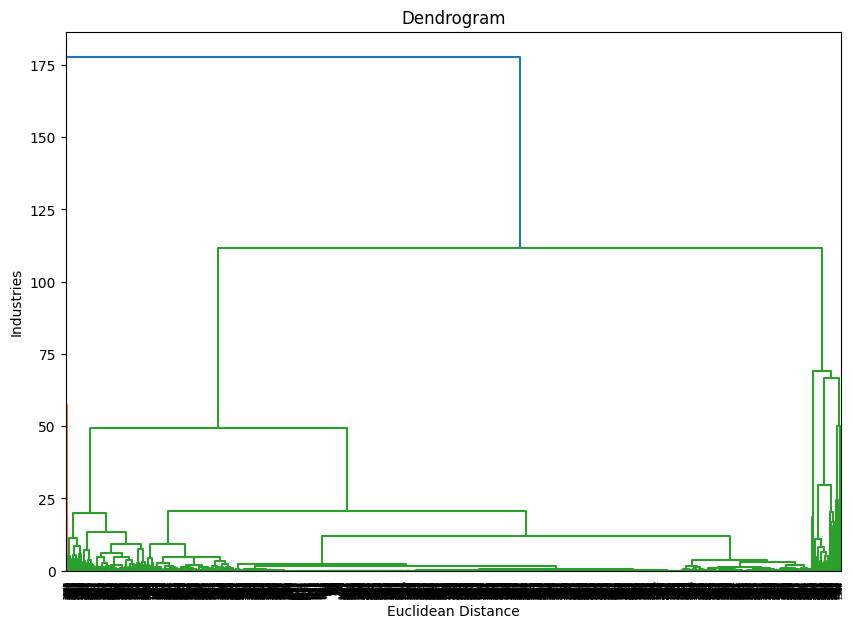

In [5]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(result_df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Euclidean Distance")
plt.ylabel("Industries")
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
cl = cluster.fit_predict(result_df)

## Score


In [7]:
from sklearn.metrics import silhouette_score

silhouette_score(result_df, cl)

0.8725962441160989

In [8]:
result_df["Cluster_ID"] = cl

## Analyse


In [11]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
2    2968
0     114
1       7
Name: count, dtype: int64


<Axes: xlabel='Cluster_ID'>

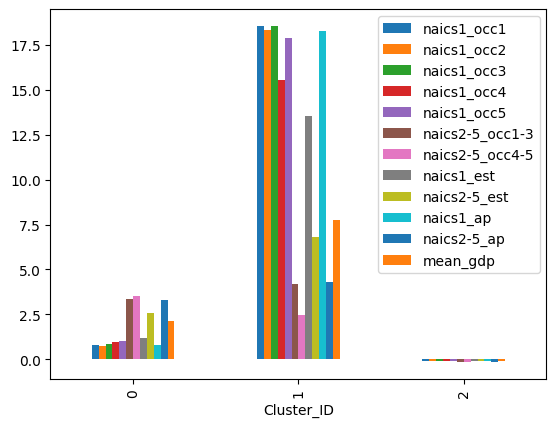

In [10]:
result_df.groupby("Cluster_ID")[selected_features].mean().plot(legend=True, kind="bar")

In [19]:
print(
    result_df[result_df["Cluster_ID"] == 0]
    .sort_values(by="mean_gdp", ascending=False)
    .head(5)
)
print(
    result_df[result_df["Cluster_ID"] == 1]
    .sort_values(by="mean_gdp", ascending=False)
    .head(5)
)

       naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-3  naics2-5_occ4-5  naics1_est  naics2-5_est  naics1_ap  naics2-5_ap  mean_gdp  Cluster_ID
FIPS                                                                                                                                                                            
6085          2.54         2.65         2.20         1.15         2.32             1.55             0.35        2.31          4.41       5.45         2.58     35.87           0
6059          3.53         3.67         3.05         1.51         3.24             5.11             2.32       15.22         12.74       3.89         7.26     12.30           0
6073          7.47         7.76         6.43         3.28         6.95             3.27             1.39        7.69          6.89      10.15         4.38      9.34           0
4013          6.65         7.08         6.31         4.70        11.64             7.25             5.32       14.4

In [9]:
pd.to_pickle(result_df, "../data/processed/result_hierarchy_df.pkl")